In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.0 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

In [4]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

Downloaded chap11.py


In [5]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap12.py')

Downloaded chap12.py


In [6]:
# import code from previous notebooks

from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

from chap12 import calc_total_infected

In [7]:
beta_array = linspace(0.1, 1.1, 11)
gamma = 0.25

In [8]:
def sweep_beta(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = calc_total_infected(results, system)
    return sweep

In [9]:
infected_sweep = sweep_beta(beta_array, gamma)

In [10]:
label = f'gamma = {gamma}'
label

'gamma = 0.25'

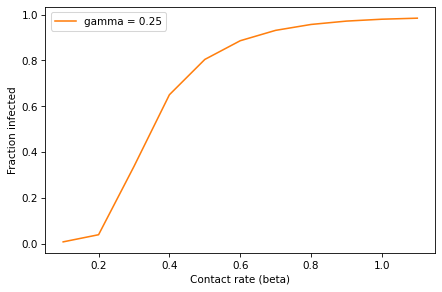

In [11]:
infected_sweep.plot(label=label, color='C1')

decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected')

In [12]:
gamma_array = linspace(0.1, 0.7, 4)
gamma_array

array([0.1, 0.3, 0.5, 0.7])

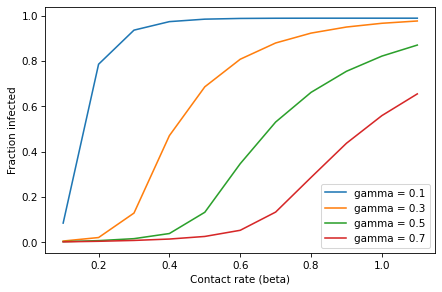

In [13]:
for gamma in gamma_array:
    infected_sweep = sweep_beta(beta_array, gamma)
    label = f'gamma = {gamma}'
    infected_sweep.plot(label=label)

decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected')

In [14]:
def sweep_parameters(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta(beta_array, gamma)
    return frame

In [ ]:
frame = sweep_parameters(beta_array, gamma_array)

With the results in a `SweepFrame`, we can plot each column like this:

In [ ]:
for gamma in gamma_array:
    label = f'gamma = {gamma}'
    frame[gamma].plot(label=label)

decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected',
         title='Sweep beta, multiple values of gamma')

Alternatively, we can plot each row like this:

In [ ]:
for beta in [0.2, 0.5, 0.8, 1.1]:
    label = f'beta = {beta}'
    frame.loc[beta].plot(label=label)

decorate(xlabel='Recovery rate (gamma)',
         ylabel='Fraction infected',
         title='Sweep gamma, multiple values of beta')

In [ ]:
contour(frame)

decorate(xlabel='Recovery rate (gamma)',
         ylabel='Contact rate (beta)',
         title='Contour plot, fraction infected')

### Exercise 1



In [ ]:
def sweep_beta_max(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = results.i.max()
    return sweep

In [ ]:
def sweep_parameters_max(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta_max(beta_array, gamma)
    return frame

In [ ]:
frame_max = sweep_parameters_max(beta_array, gamma_array)


In [ ]:
contour(frame_max)

decorate(xlabel='Recovery rate (gamma)',
         ylabel='Contact rate (beta)',
         title='Contour plot, maximum I')

In [ ]:
system = make_system(0.8, 0.2)
results = run_simulation(system, update_func)
plot_results(results.s, results.i, results.r)

In [ ]:
from matplotlib.pyplot import plot

def plot_sweep_frame(frame):
    for gamma in frame.columns:
        series = frame[gamma]
        for beta in series.index:
            metric = series[beta]
            plot(beta/gamma, metric, '.', color='C1')

In [ ]:
plot_sweep_frame(frame_max)


In [ ]:
frac_infected_series = make_series(c_array, frac_infected)


In [ ]:

from pandas import Series

frac_infected_series = Series(frac_infected, c_array)